In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [40]:
# Load Dataset

df = pd.read_csv("/Users/immd/Downloads/Lab3 machine/ house_prices.csv")

# Display first 5 rows
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [41]:
# Check all values
print(df.isna())

        Index  Title  Description  Amount(in rupees)  Price (in rupees)  \
0       False  False        False              False              False   
1       False  False        False              False              False   
2       False  False        False              False              False   
3       False  False        False              False               True   
4       False  False        False              False              False   
...       ...    ...          ...                ...                ...   
187526  False  False        False              False              False   
187527  False  False        False              False              False   
187528  False  False        False              False              False   
187529  False  False        False              False              False   
187530  False  False        False              False              False   

        location  Carpet Area  Status  Floor  Transaction  ...  facing  \
0          False        F

In [42]:
print(df.isna().sum())

Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64


In [43]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

In [44]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (187531, 21) 

number of rows:  187531
number of columns:  21


In [45]:
# viewing the data types of columns
df.dtypes

Index                  int64
Title                    str
Description              str
Amount(in rupees)        str
Price (in rupees)    float64
location                 str
Carpet Area              str
Status                   str
Floor                    str
Transaction              str
Furnishing               str
facing                   str
overlooking              str
Society                  str
Bathroom                 str
Balcony                  str
Car Parking              str
Ownership                str
Super Area               str
Dimensions           float64
Plot Area            float64
dtype: object

In [46]:
df['Price (in rupees)'] = df['Price (in rupees)'].replace(r'[,\₹]', '', regex=True)
df['Price (in rupees)'] = pd.to_numeric(df['Price (in rupees)'])
df.dtypes

Index                  int64
Title                    str
Description              str
Amount(in rupees)        str
Price (in rupees)    float64
location                 str
Carpet Area              str
Status                   str
Floor                    str
Transaction              str
Furnishing               str
facing                   str
overlooking              str
Society                  str
Bathroom                 str
Balcony                  str
Car Parking              str
Ownership                str
Super Area               str
Dimensions           float64
Plot Area            float64
dtype: object

In [47]:
df['Carpet Area'] = df['Carpet Area'].str.extract('(\d+)')
df['Carpet Area'] = pd.to_numeric(df['Carpet Area'], errors='coerce')


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/c6/lwx5dfhd39ggy32w8b66y2fw0000gn/T/ipykernel_2499/3609930472.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Carpet Area'] = df['Carpet Area'].str.extract('(\d+)')


In [48]:
df['Super Area'] = df['Super Area'].str.extract('(\d+)')
df['Super Area'] = pd.to_numeric(df['Super Area'], errors='coerce')


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/c6/lwx5dfhd39ggy32w8b66y2fw0000gn/T/ipykernel_2499/186314811.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Super Area'] = df['Super Area'].str.extract('(\d+)')


In [49]:
df['Bathroom'] = pd.to_numeric(df['Bathroom'], errors='coerce')


In [50]:
# Statistical summary
df.describe(include='all')

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
count,187531.000000,187531,184508,187531,1.698660e+05,187531,106858.000000,186916,180454,187448,...,117298,106095,77853,186668.000000,138596,84174,122014,79846.000000,0.0,0.0
unique,NaN,32446,65634,1561,NaN,81,NaN,1,947,4,...,8,19,10376,NaN,11,229,4,NaN,NaN,NaN
top,NaN,2 BHK Ready to Occupy Flat for sale in Divyasr...,Multistorey apartment is available for sale. I...,Call for Price,NaN,new-delhi,NaN,Ready to Move,2 out of 4,Resale,...,East,Main Road,Hamdam Apartment,NaN,2,1 Covered,Freehold,NaN,NaN,NaN
freq,NaN,2106,2732,9684,NaN,27599,NaN,186916,12433,144172,...,54741,32193,1648,NaN,51809,38754,112229,NaN,NaN,NaN
mean,93765.000000,NaN,NaN,NaN,7.583772e+03,NaN,1199.795186,NaN,NaN,NaN,...,NaN,NaN,NaN,2.426640,NaN,NaN,NaN,1306.893733,NaN,NaN
std,54135.681003,NaN,NaN,NaN,2.724171e+04,NaN,3046.197568,NaN,NaN,NaN,...,NaN,NaN,NaN,0.863244,NaN,NaN,NaN,687.200582,NaN,NaN
min,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN
25%,46882.500000,NaN,NaN,NaN,4.297000e+03,NaN,745.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,921.000000,NaN,NaN
50%,93765.000000,NaN,NaN,NaN,6.034000e+03,NaN,1000.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,1250.000000,NaN,NaN
75%,140647.500000,NaN,NaN,NaN,9.450000e+03,NaN,1500.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,1650.000000,NaN,NaN


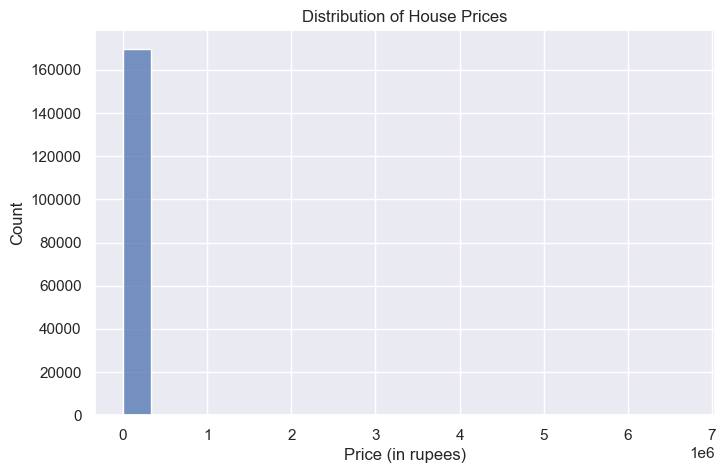

In [51]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price (in rupees)'], bins=20)
plt.title("Distribution of House Prices")
plt.show()


In [52]:
df['Price (in rupees)'] = df['Price (in rupees)'].replace(',', '', regex=True)
df['Price (in rupees)'] = pd.to_numeric(df['Price (in rupees)'], errors='coerce')


In [53]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric.head()


,Index,Price (in rupees),Carpet Area,Bathroom,Super Area,Dimensions,Plot Area
0,0,6000.0,500.0,1.0,NaN,NaN,NaN
1,1,13799.0,473.0,2.0,NaN,NaN,NaN
2,2,17500.0,779.0,2.0,NaN,NaN,NaN
3,3,NaN,530.0,1.0,NaN,NaN,NaN
4,4,18824.0,635.0,2.0,NaN,NaN,NaN


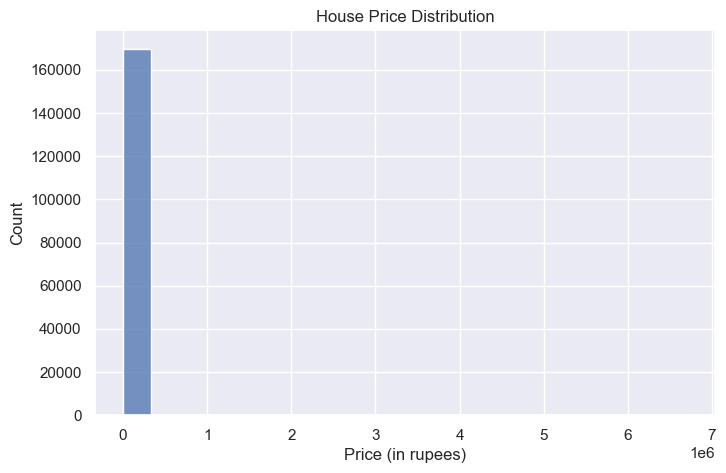

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Price (in rupees)'], bins=20)
plt.title("House Price Distribution")
plt.show()


In [55]:
y = df['Price (in rupees)']
X = df_numeric.drop('Price (in rupees)', axis=1)


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


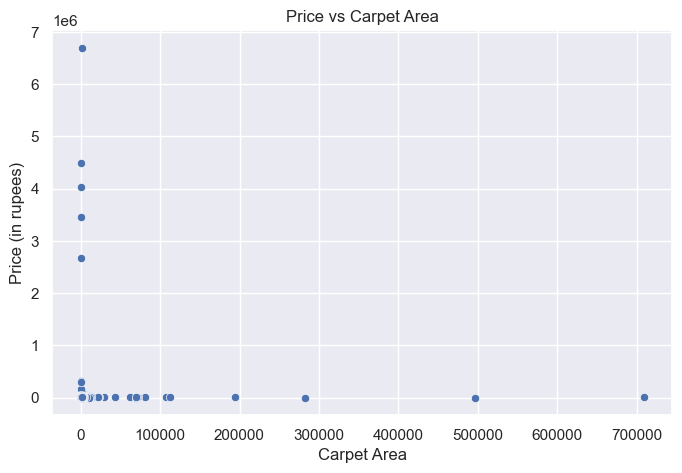

In [57]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Carpet Area'], y=df['Price (in rupees)'])
plt.title("Price vs Carpet Area")
plt.show()


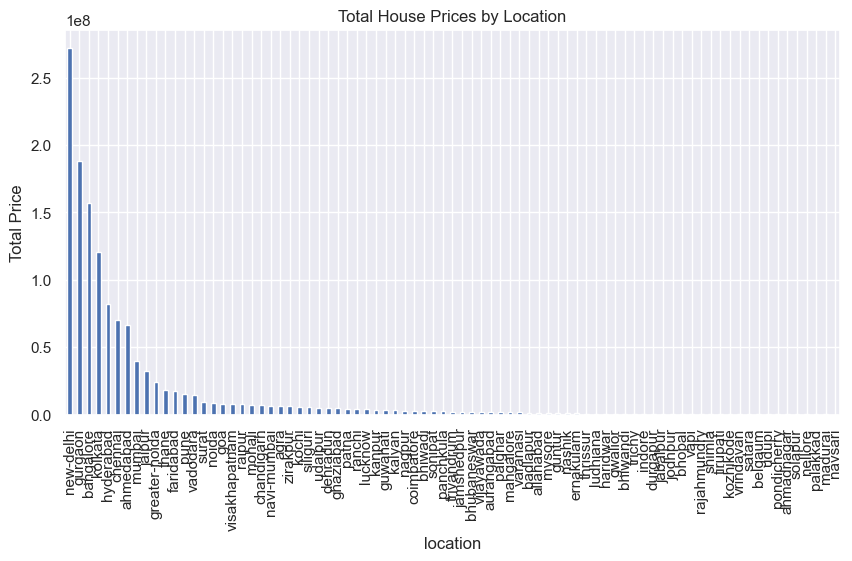

location
new-delhi    271950075.0
gurgaon      188279881.0
bangalore    156747274.0
kolkata      120263463.0
hyderabad     82015758.0
                ...     
solapur         108882.0
nellore         107811.0
palakkad        104434.0
madurai          95808.0
navsari          56745.0
Name: Price (in rupees), Length: 81, dtype: float64

In [58]:
country_revenue = df.groupby('location')['Price (in rupees)'] \
                    .sum() \
                    .sort_values(ascending=False)

plt.figure(figsize=(10,5))
country_revenue.plot(kind='bar')
plt.title("Total House Prices by Location")
plt.ylabel("Total Price")
plt.show()

country_revenue


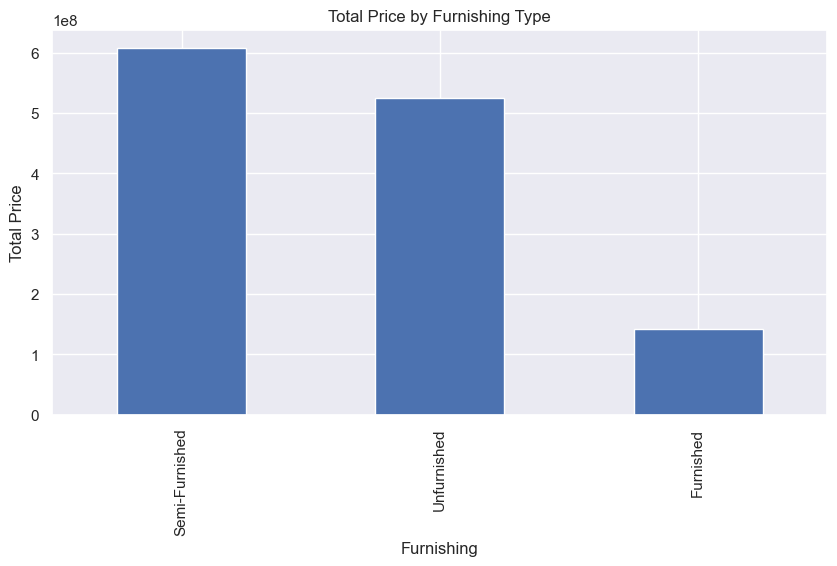

Furnishing
Semi-Furnished    607914828.0
Unfurnished       524641468.0
Furnished         142467057.0
Name: Price (in rupees), dtype: float64

In [59]:
product_revenue = df.groupby('Furnishing')['Price (in rupees)'] \
                    .sum() \
                    .sort_values(ascending=False)

plt.figure(figsize=(10,5))
product_revenue.plot(kind='bar')
plt.title("Total Price by Furnishing Type")
plt.ylabel("Total Price")
plt.show()

product_revenue


In [60]:
salesperson_revenue = df.groupby('location')['Price (in rupees)'] \
                        .sum() \
                        .sort_values(ascending=False)

salesperson_revenue.head(10)


location
new-delhi        271950075.0
gurgaon          188279881.0
bangalore        156747274.0
kolkata          120263463.0
hyderabad         82015758.0
chennai           70261218.0
ahmedabad         66484189.0
mumbai            39889946.0
jaipur            32089592.0
greater-noida     23974549.0
Name: Price (in rupees), dtype: float64

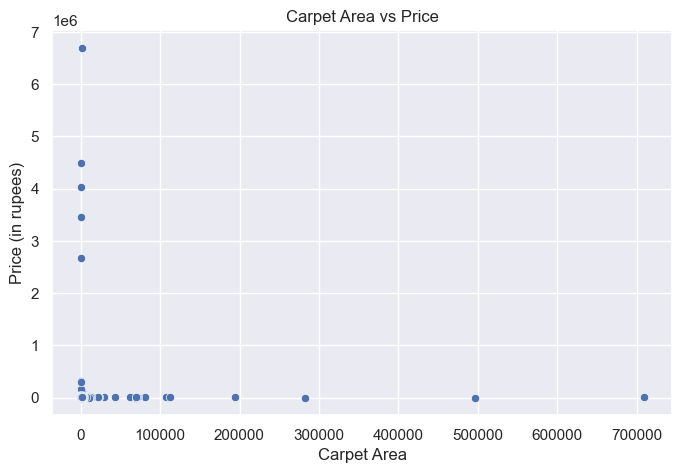

In [61]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Carpet Area', y='Price (in rupees)', data=df)
plt.title("Carpet Area vs Price")
plt.show()


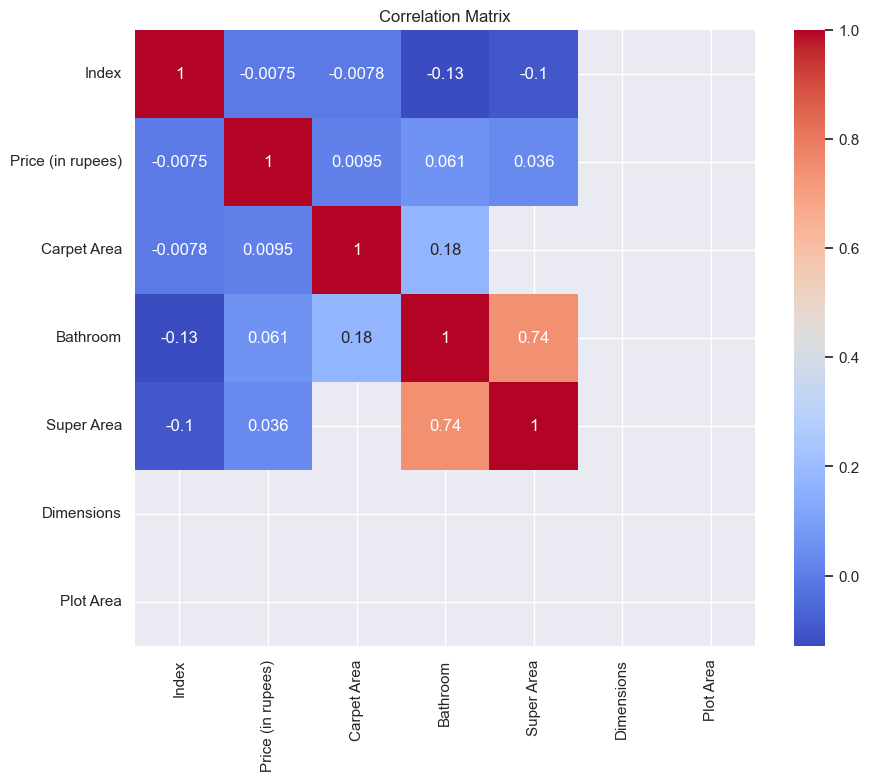

In [62]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


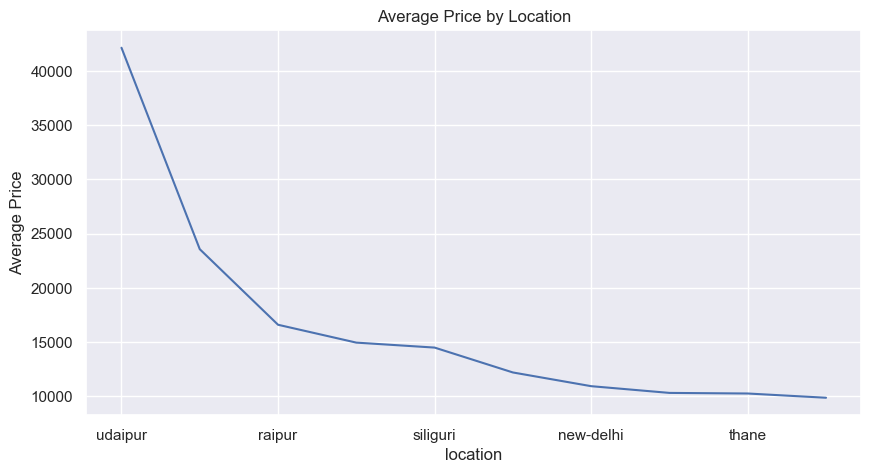

In [63]:
monthly_revenue = df.groupby('location')['Price (in rupees)'].mean()

plt.figure(figsize=(10,5))
monthly_revenue.sort_values(ascending=False).head(10).plot()
plt.title("Average Price by Location")
plt.ylabel("Average Price")
plt.show()
